# Task-2: Implement an image color detector which identifies all the colors in an image
### Author: Ritik Chawla
### GRIPMAY22

Using KMeans for identification of colors in the image

## Import libraries
For this work, I need sklearn for KMeans algorithm, opencv for image manipulation, numpy to work with arrays and matplotlib.pyplot for plotting graphs.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape; (360, 640, 3)


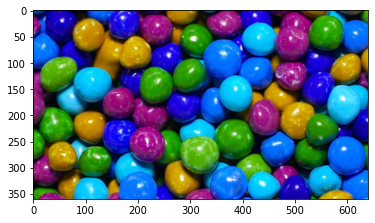

In [2]:
# read the input image
image = cv2.imread('images/img.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape; {}".format(image.shape))
plt.imshow(image)

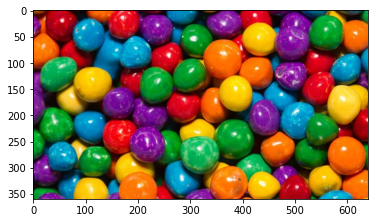

In [3]:
# convert image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

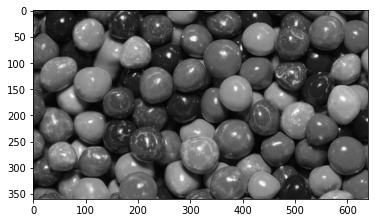

In [4]:
# convert image to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## Color Identification

In [5]:
# load image and convert it to RGB
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [6]:
# define a function that will convert RGB to hex (get labels color for the output pie chart)
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
# color identification method
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize=(10,20))
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.title("Color Identification", fontsize=25)
        return rgb_colors

[array([40.99810934, 29.17368442, 22.94786907]),
 array([234.17688174, 112.59792664,   9.40882793]),
 array([  7.49400462, 138.77895933, 182.42726706]),
 array([203.44800324, 201.63571863, 186.8232313 ]),
 array([186.57645903,  18.14100635,  20.78755411]),
 array([ 14.14912487, 146.26595717,  53.50272583]),
 array([124.35852489,  28.35243693, 144.09513313]),
 array([245.58343982, 194.39905443,  17.89969333])]

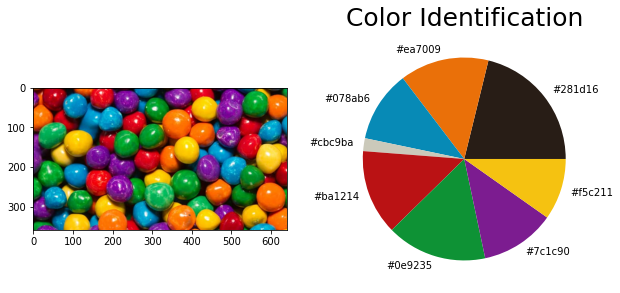

In [8]:
image_Path='images/img.jpg'
get_colors(get_image(image_Path), 8, True)

In [9]:
# color identification for a set of images in specific directory
IMAGE_DIRECTORY = r'images'
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

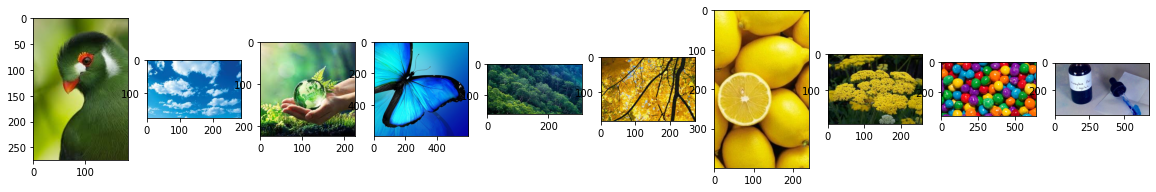

In [10]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [11]:
def show_colors(images):
    index = 1
    
    for i in range(len(images)):
        get_colors(images[i], 8, True)

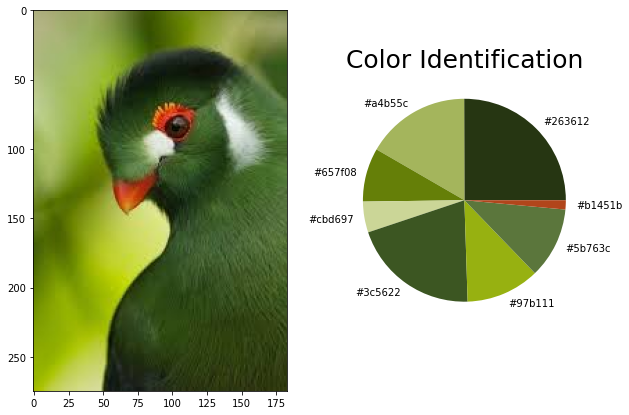

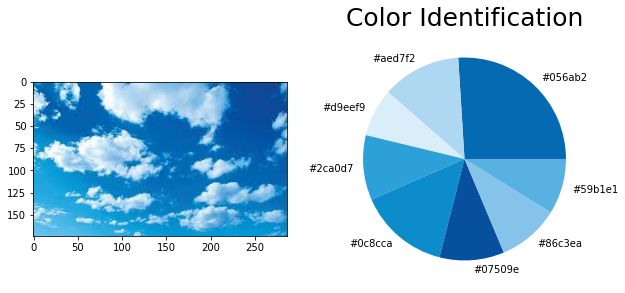

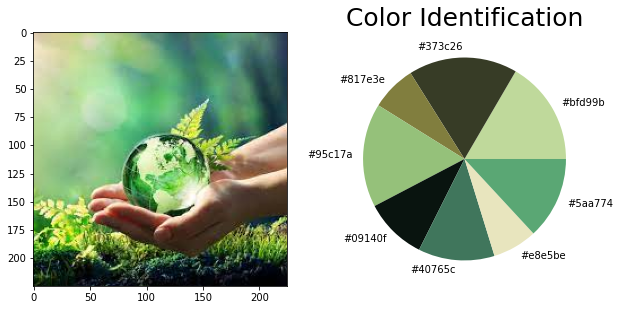

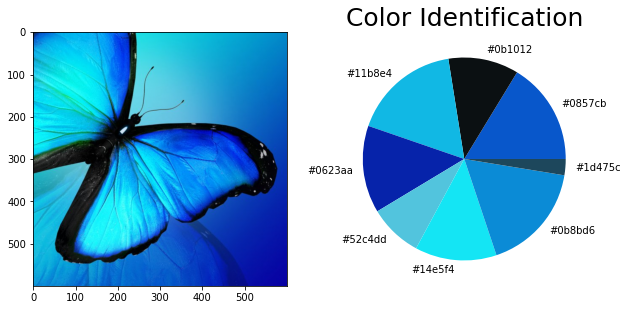

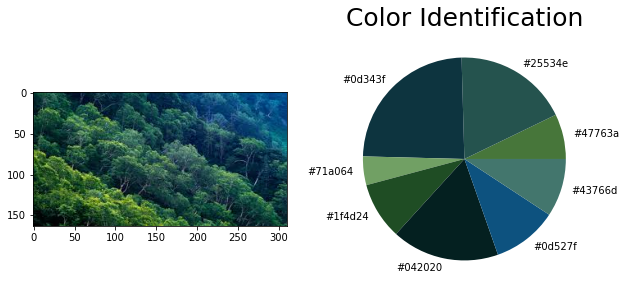

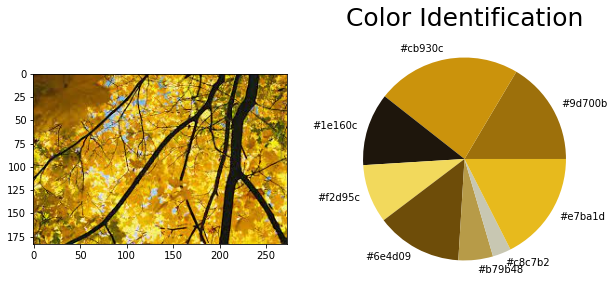

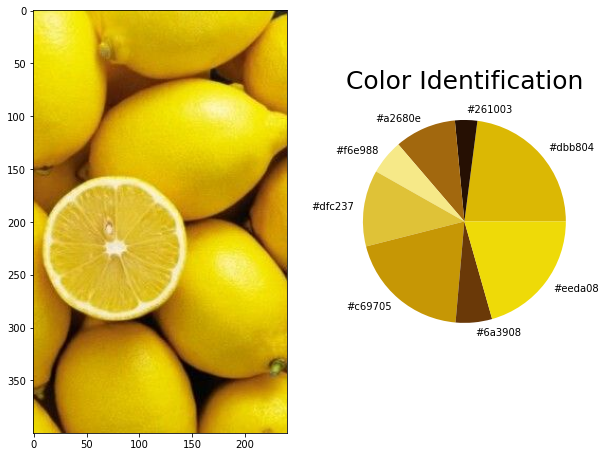

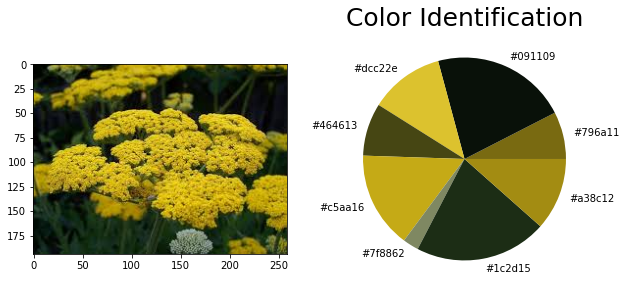

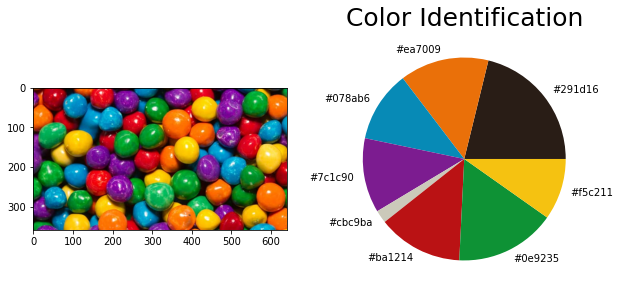

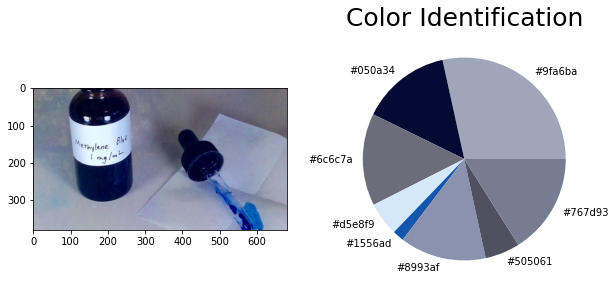

In [12]:
show_colors(images)

Thank YOU!!